In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산

### data 읽어오기

In [106]:
data = pd.read_csv("final_data.csv")
data_size = len(data)
label = data['label']

### 단어에 word2vec 적용하기

In [107]:
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import gensim
import numpy as np

# Load a pre-trained Word2Vec model (replace 'path/to/your/model' with the actual path)
model = gensim.models.Word2Vec.load('ko.bin')
print(model.wv.vectors.shape)  # 모델 내 단어 갯수는 30185개

# List of words to be labeled
word_list = label

# Create a dictionary to store word vectors
word_vectors = {}
NaN = []

# Populate the dictionary with word vectors
for word in word_list:
    try:
        new_word = word.strip(" ")
        word_vectors[new_word] = model[new_word]
    except KeyError:
        # Handle the case where the word is not in the vocabulary
        print(f"Word '{new_word}' not in vocabulary.")
        NaN.append(word)
word_vectors
word_df = pd.DataFrame(word_vectors)
word_df

(30185, 200)
Word '정색' not in vocabulary.
Word '놀람' not in vocabulary.
Word '신남' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '창피' not in vocabulary.
Word '용돈' not in vocabulary.
Word '흥정' not in vocabulary.
Word '반가움' not in vocabulary.
Word '황당' not in vocabulary.
Word '염탐' not in vocabulary.
Word '좋음' not in vocabulary.
Word '눈빛' not in vocabulary.
Word '시큼' not in vocabulary.
Word '흥겨움' not in vocabulary.
Word '민망' not in vocabulary.
Word '시무룩' not in vocabulary.
Word '수줍음' not in vocabulary.
Word '황당' not in vocabulary.
Word '놀람' not in vocabulary.
Word '식탐' not in vocabulary.
Word '광분' not in vocabulary.
Word '황당' not in vocabulary.
Word '까칠' not in vocabulary.
Word '황당' not in vocabulary.
Word '모른척' not in vocabulary.
Word '소리침' not in vocabulary.
Word '소분노' not in vocabulary.
Word '애교' not in vocabulary.
Word '까불' not in vocabulary.
Word '의아심' not in vocabulary.
Word '낭패' not in vocabulary.
Word '허기' not in vocabulary.
Word '까불' not in voc

C:\Users\samsung\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning:

C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.

C:\Users\samsung\AppData\Local\Temp\ipykernel_1816\736513206.py:21: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



,소외,다이어트,실패,긍정,피자,식사,거절,후회,불만,의문,...,배제,기운,쌈,중퇴,기권,불운,택시,악수,단합,첫사랑
0,-0.483972,0.350489,-2.855057,0.604088,-0.249783,-0.078015,-1.639856,-0.566500,-0.483653,-0.930253,...,-1.141052,-0.488868,0.582259,-0.389181,0.488638,-0.353876,-0.777993,0.116270,0.105651,-0.408059
1,0.729992,-0.073935,-2.316781,0.042427,-0.138864,-0.141852,0.313289,-0.149665,-1.457357,1.285335,...,0.325202,-0.558134,-0.292869,0.465061,0.148463,0.012763,0.556049,-0.102036,-0.329373,-0.361370
2,0.905891,0.783086,-2.049907,0.334306,0.487499,0.076565,-0.617230,0.485574,-0.022496,-0.213127,...,-1.836984,1.118696,0.163051,0.201750,-0.174053,0.118373,-0.493491,-0.266882,0.166661,0.390251
3,-1.352918,-0.253822,-0.172188,-0.550515,0.655443,-1.799743,-2.516470,-1.070929,-0.841431,0.990372,...,-2.533406,-0.477913,0.355790,-0.749999,-0.797655,-0.010570,-0.504610,-0.914001,-0.552056,-0.043357
4,-0.534489,-0.219407,0.991559,0.180508,0.213461,0.059684,1.357738,-0.697496,1.265670,0.682610,...,0.919822,-0.173301,0.007159,-0.760697,0.299453,0.155991,-1.098105,0.251541,0.204312,-0.242011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.091903,0.594744,-0.574114,-0.301485,0.243577,2.005394,-1.615624,0.163686,-0.002320,-0.135782,...,-0.811525,-0.027841,0.325878,0.576907,-0.371526,0.070761,0.199327,0.029952,-0.096820,-0.203547
196,1.107072,0.479835,0.598401,0.100404,0.236785,0.298742,-0.093244,0.073304,0.763229,2.288591,...,0.363493,0.921475,-0.225511,1.117324,-0.402078,0.440481,-0.156720,-0.168130,0.110475,-0.131888
197,0.488668,0.401557,0.870932,0.431045,0.092349,2.047430,1.049325,-0.054836,0.497921,2.000011,...,0.555157,0.397747,0.016883,-0.528362,0.696320,0.125680,0.370761,0.010330,-0.131035,-0.071702
198,2.433382,0.255171,-0.324395,-0.043831,0.956416,2.501294,-0.833250,-0.129242,-0.830422,-1.351598,...,2.195479,-0.276788,0.300567,0.546496,-1.529978,0.127028,0.291381,0.205894,0.577021,-0.107796


In [108]:
print(list(set(NaN)))

['수줍음', '소분노', '창피', '황당', '염탐', '식탐', '광분', '좋음', '민망', '시무룩', '흥정', '까칠', '고요함', '허기', '신남', '반가움', '흥겨움', '용돈', '의아심', '인셍', '눈빛', '정색', '소리침', '낭패', '모른척', '까불', '애교', '시큼', '놀람']


In [109]:
word_matrix = word_df.transpose()
word_matrix

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
소외,-0.483972,0.729992,0.905891,-1.352918,-0.534489,-0.246235,-1.429191,0.520611,-0.383976,1.008037,...,0.241350,0.174665,-0.411606,-0.288752,-0.160790,-0.091903,1.107072,0.488668,2.433382,-0.037658
다이어트,0.350489,-0.073935,0.783086,-0.253822,-0.219407,-0.172415,-0.279633,0.704964,0.238278,-0.160904,...,-0.373632,0.288896,0.012419,0.077824,0.273780,0.594744,0.479835,0.401557,0.255171,0.174620
실패,-2.855057,-2.316781,-2.049907,-0.172188,0.991559,-2.094825,-0.073328,1.960894,0.012275,0.211430,...,0.566378,0.337536,-0.024208,-1.114787,-1.478428,-0.574114,0.598401,0.870932,-0.324395,-0.643110
긍정,0.604088,0.042427,0.334306,-0.550515,0.180508,-0.333037,-0.117227,-0.265808,-0.576902,0.435154,...,-0.168106,-0.802308,0.358216,-0.951309,0.196382,-0.301485,0.100404,0.431045,-0.043831,-0.521822
피자,-0.249783,-0.138864,0.487499,0.655443,0.213461,-0.402867,1.817255,0.645031,0.397606,-0.521637,...,-1.396192,0.220774,1.046692,0.155005,-0.372727,0.243577,0.236785,0.092349,0.956416,0.177844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
불운,-0.353876,0.012763,0.118373,-0.010570,0.155991,-0.082212,0.078788,0.054140,-0.047410,0.065181,...,0.144083,0.067802,-0.042004,-0.443382,0.340053,0.070761,0.440481,0.125680,0.127028,-0.425117
택시,-0.777993,0.556049,-0.493491,-0.504610,-1.098105,0.500979,0.562056,0.092105,-0.062316,-2.232370,...,-0.432319,-0.114310,-0.982485,0.894460,-0.367178,0.199327,-0.156720,0.370761,0.291381,-1.192952
악수,0.116270,-0.102036,-0.266882,-0.914001,0.251541,-0.021427,-0.038164,0.395506,0.410472,-0.115092,...,0.377181,0.335755,0.205232,0.194565,0.133880,0.029952,-0.168130,0.010330,0.205894,-0.109291
단합,0.105651,-0.329373,0.166661,-0.552056,0.204312,-0.228424,0.084427,0.284063,0.074972,0.052501,...,-0.087844,-0.352375,0.041892,-0.088083,-0.372224,-0.096820,0.110475,-0.131035,0.577021,0.070180


### 3차원 시각화

In [110]:
import numpy as np
from sklearn.decomposition import PCA

# Number of desired dimensions after PCA
n_components = 3

# Standardize the features (optional but recommended for PCA)
data_standardized = (word_matrix - np.mean(word_matrix, axis=0)) / np.std(word_matrix, axis=0)

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform the data
data_reduced = pca.fit_transform(data_standardized)

# The variable data_reduced now contains the data in 24 dimensions

# Print the explained variance ratio for each selected component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

# Optionally, if you want to access the principal components themselves
principal_components = pca.components_

# You can also access the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio for each component:
[0.06086345 0.05061397 0.04464021]

Cumulative Explained Variance:
[0.06086345 0.11147742 0.15611763]


In [111]:
data_reduced

array([[ 3.6289296 , -0.97015065, -1.0066916 ],
       [-1.9649972 , -2.332631  , -0.7522542 ],
       [ 6.5203795 ,  0.4547388 ,  6.832318  ],
       ...,
       [-1.8349422 , -1.3467319 ,  1.354728  ],
       [-0.23963368, -2.1775112 ,  0.2292426 ],
       [-2.616579  , -0.35871878,  0.34971237]], dtype=float32)

##### 최적의 cluster 찾기

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:

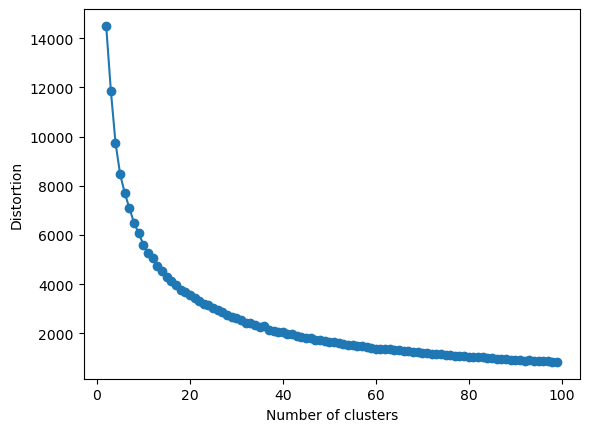

In [112]:
distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:

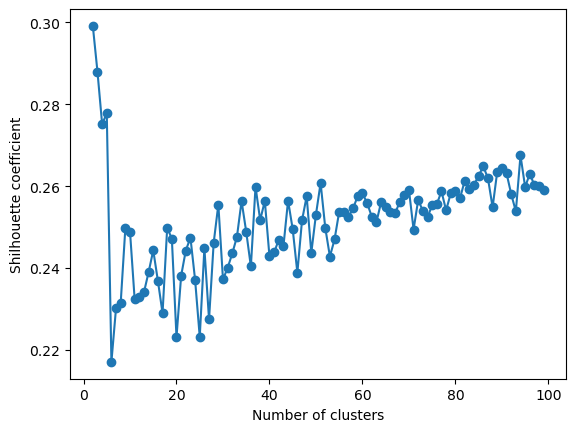

In [113]:
silhouette = []

for i in range(2,100):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(data_reduced) # 모형 훈련
    silhouette_values = silhouette_score(data_reduced, kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,100), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [114]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



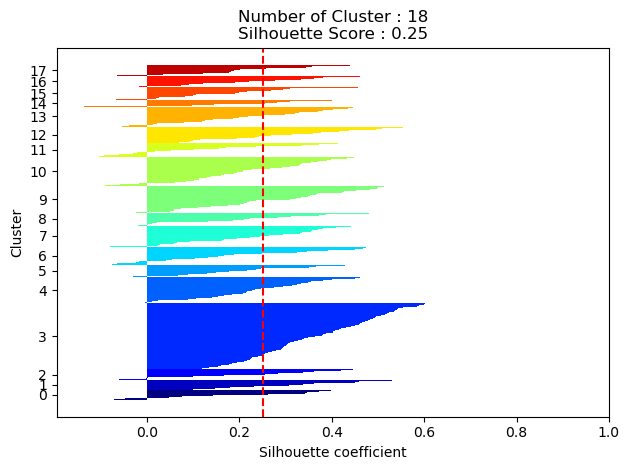

In [115]:
silhouetteViz(18, data_reduced)


In [116]:
kmeans = KMeans(n_clusters=18, random_state=42)
res1 = pd.DataFrame(data_reduced)
model = kmeans.fit_predict(data_reduced)
res1["Cluster"] = model
res1

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



,0,1,2,Cluster
0,3.628930,-0.970151,-1.006692,12
1,-1.964997,-2.332631,-0.752254,9
2,6.520380,0.454739,6.832318,16
3,1.949134,-0.262465,-1.362910,4
4,-5.825227,-3.119106,0.208381,6
...,...,...,...,...
622,-0.914607,0.281091,-0.301547,9
623,-2.494616,-4.288839,1.046970,6
624,-1.834942,-1.346732,1.354728,9
625,-0.239634,-2.177511,0.229243,9


In [117]:
res2 = res1.copy()
res2.index = word_matrix.index
res2

,0,1,2,Cluster
소외,3.628930,-0.970151,-1.006692,12
다이어트,-1.964997,-2.332631,-0.752254,9
실패,6.520380,0.454739,6.832318,16
긍정,1.949134,-0.262465,-1.362910,4
피자,-5.825227,-3.119106,0.208381,6
...,...,...,...,...
불운,-0.914607,0.281091,-0.301547,9
택시,-2.494616,-4.288839,1.046970,6
악수,-1.834942,-1.346732,1.354728,9
단합,-0.239634,-2.177511,0.229243,9


In [118]:
res2[res2['Cluster'] == 1]

,0,1,2,Cluster
공부,1.424351,0.050718,4.635137,1
구타,1.004009,0.792574,4.690707,1
만류,0.596857,1.970207,4.906217,1
등장,-3.868433,-2.449926,4.981187,1
일,-2.875318,-4.465365,4.639931,1
발견,-1.156619,-3.444777,3.619113,1
마무리,0.314226,-2.291392,4.307317,1
출생,-2.158579,-1.673702,5.004039,1
소개,0.949601,-1.981231,3.098512,1
수감,1.267545,-1.818779,6.070667,1


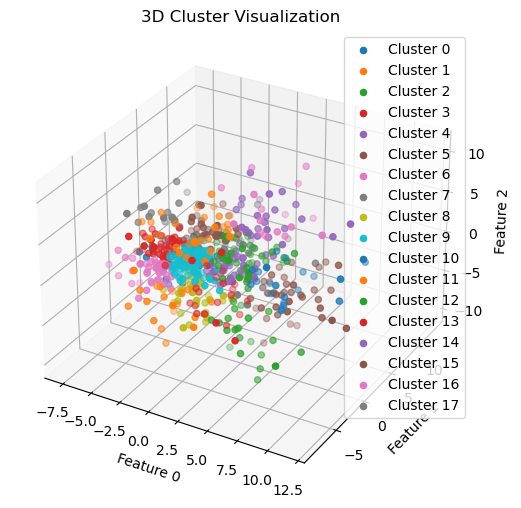

In [119]:

df = res2

# Visualize the 3D clusters
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(df['Cluster'].nunique()):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=f'Cluster {cluster}')

ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.set_zlabel('Feature 2')
ax.set_title('3D Cluster Visualization')
ax.legend()

plt.show()

In [17]:
!pip install plotly


In [120]:
import plotly.graph_objects as go

# Assuming your DataFrame is named 'res3'

# Create a 3D scatter plot using Plotly
fig = go.Figure()

for cluster in range(res2['Cluster'].nunique()):
    cluster_data = res2[res2['Cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data[0],
        y=cluster_data[1],
        z=cluster_data[2],
        mode='markers',
        marker=dict(size=5, color=cluster, opacity=0.7),
        name=f'Cluster {cluster}'
    ))

# Layout settings
fig.update_layout(
    scene=dict(
        xaxis_title='Feature 0',
        yaxis_title='Feature 1',
        zaxis_title='Feature 2',
        aspectmode='cube'
    ),
    title='Interactive 3D Cluster Visualization',
    width=800,  # Adjust the width as needed
    height=600  # Adjust the height as needed
)

# Show the interactive plot in the Jupyter Notebook
fig.show()


## 최적의 성능을 내는 모델 

#### 적절한 PCA 값 찾기 1

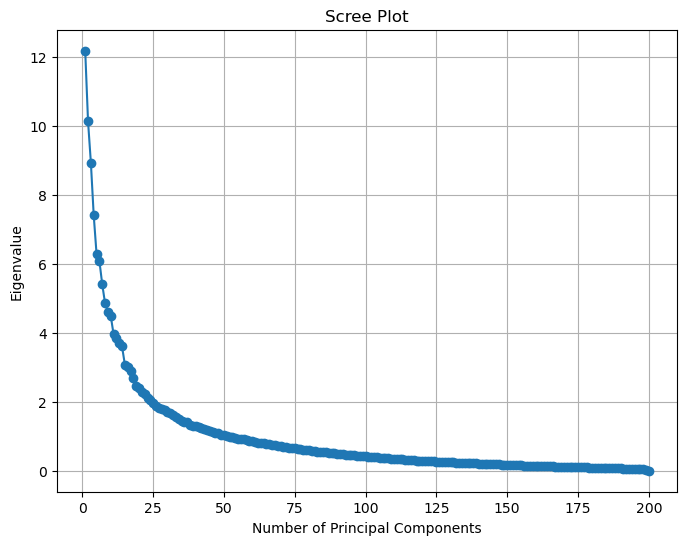

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load a sample dataset (replace this with your own data)

# Standardize the features (optional but recommended for PCA)
X_standardized = (word_matrix - np.mean(word_matrix, axis=0)) / np.std(word_matrix, axis=0)

# Fit PCA and obtain the eigenvalues
pca = PCA()
pca.fit(X_standardized)
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

##### 5~ 15차원 사이의 값이 PCA에 가장 적절하다

#### 적절한 PCA 값 찾기 2


In [20]:
! pip install optuna

In [21]:
import optuna
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

X = word_matrix
# Define an objective function to optimize
def objective(trial):
    # Define the search space for hyperparameters
    n_components = trial.suggest_int('n_components',3,30)  # Number of components in PCA
    n_clusters = trial.suggest_int('n_clusters', 10,30)  # Number of clusters in KMeans

    # Create a pipeline with PCA and KMeans
    pipeline = Pipeline([
        ('reduce_dim', PCA(n_components=n_components)),
        ('cluster', KMeans(n_clusters=n_clusters))
    ])

    # Fit the pipeline
    pipeline.fit(X)

    # Evaluate the performance using silhouette score
    silhouette_avg = silhouette_score(X, pipeline.named_steps['cluster'].labels_)
    return silhouette_avg

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')  # maximize silhouette score
study.optimize(objective, n_trials=50)  # perform 50 trials

# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)


[I 2023-12-08 09:26:41,846] A new study created in memory with name: no-name-5622a226-eea8-401c-a692-7ab173ddb9e6
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

[I 2023-12-08 09:26:41,914] Trial 0 finished with value: 0.0013201456749811769 and parameters: {'n_components': 20, 'n_clusters': 15}. Best is trial 0 with value: 0.0013201456749811769.
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to

Best Hyperparameters: {'n_components': 25, 'n_clusters': 18}


#### 적절한 PCA 값 찾기 3


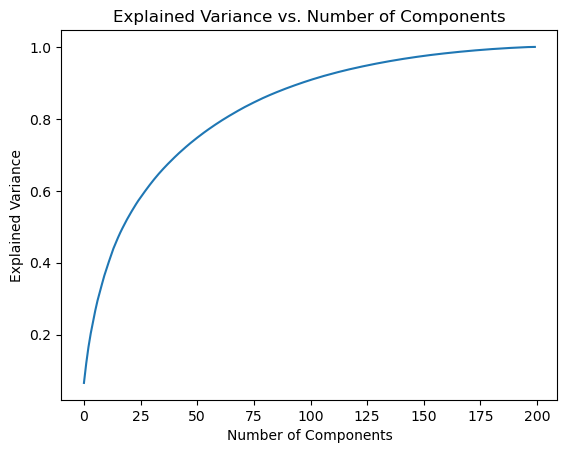

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
pca.fit(word_matrix)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


### PCA로 차원 축소

In [121]:
import numpy as np
from sklearn.decomposition import PCA

# Number of desired dimensions after PCA
n_components = 4

# Standardize the features (optional but recommended for PCA)
data_standardized = (word_matrix - np.mean(word_matrix, axis=0)) / np.std(word_matrix, axis=0)

# Initialize PCA with the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA and transform the data
data_reduced = pca.fit_transform(data_standardized)

# The variable data_reduced now contains the data in 24 dimensions

# Print the explained variance ratio for each selected component
print("Explained Variance Ratio for each component:")
print(pca.explained_variance_ratio_)

# Optionally, if you want to access the principal components themselves
principal_components = pca.components_

# You can also access the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Print the cumulative explained variance
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio for each component:
[0.06086347 0.05061392 0.04464026 0.03704261]

Cumulative Explained Variance:
[0.06086347 0.11147739 0.15611765 0.19316027]


#### 적절한 cluster 값 찾기 1


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:

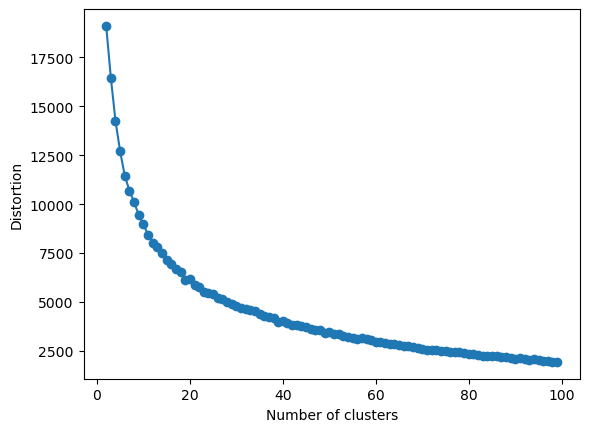

In [93]:
distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### 적절한 cluster 값 찾기 2


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:

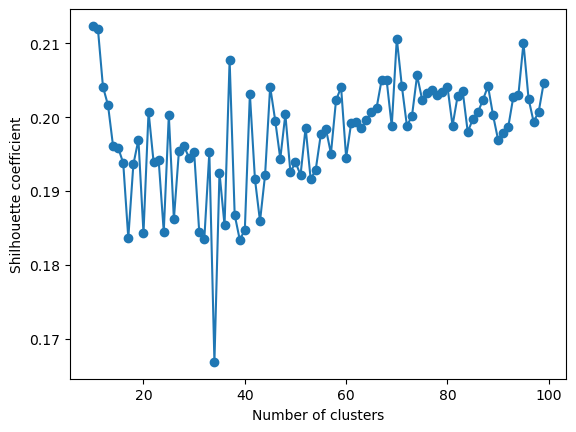

In [79]:
silhouette = []

for i in range(10, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(data_reduced)  # 모형 훈련
    silhouette_values = silhouette_score(data_reduced, kmeans_i.labels_)
    silhouette.append(silhouette_values)

plt.plot(range(10, 100), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()


#### 적절한 cluster 값 찾기 3


In [80]:
from matplotlib import cm

def silhouetteViz(n_cluster, X_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)

    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : ' + str(n_cluster) + '\n' \
              + 'Silhouette Score : ' + str(round(silhouette_avg, 3)))
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



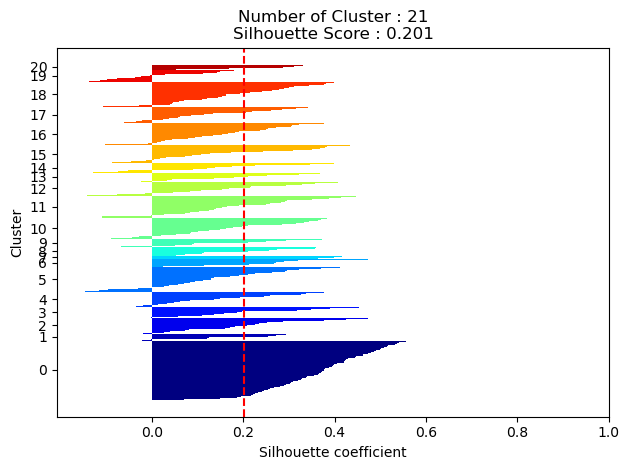

In [81]:
silhouetteViz(21, data_reduced)


### 결정된 PCA 차원, cluster 값으로 Kmeans 진행

In [94]:
kmeans = KMeans(n_clusters=21, random_state=42)
res1 = pd.DataFrame(data_reduced)
model = kmeans.fit_predict(data_reduced)
res1["Cluster"] = model
res1


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



,0,1,2,3,Cluster
0,3.629190,-0.970003,-1.007212,-0.796523,10
1,-1.965034,-2.332787,-0.751340,0.127449,13
2,6.519519,0.453799,6.834431,3.934206,12
3,1.949317,-0.262242,-1.360322,-0.050534,10
4,-5.825842,-3.119686,0.204585,0.177533,15
...,...,...,...,...,...
622,-0.914678,0.281086,-0.301950,-0.182262,8
623,-2.495049,-4.289207,1.041676,-1.312563,13
624,-1.834880,-1.346670,1.356172,-0.988759,13
625,-0.239510,-2.177329,0.231571,-0.896396,13


In [95]:
res2 = res1.copy()
res2.index = word_matrix.index
res2

,0,1,2,3,Cluster
소외,3.629190,-0.970003,-1.007212,-0.796523,10
다이어트,-1.965034,-2.332787,-0.751340,0.127449,13
실패,6.519519,0.453799,6.834431,3.934206,12
긍정,1.949317,-0.262242,-1.360322,-0.050534,10
피자,-5.825842,-3.119686,0.204585,0.177533,15
...,...,...,...,...,...
불운,-0.914678,0.281086,-0.301950,-0.182262,8
택시,-2.495049,-4.289207,1.041676,-1.312563,13
악수,-1.834880,-1.346670,1.356172,-0.988759,13
단합,-0.239510,-2.177329,0.231571,-0.896396,13


In [96]:
res2[res2['Cluster'] == 18]

,0,1,2,3,Cluster
외면,2.704063,1.251754,1.394083,0.445192,18
복수,0.610793,1.110821,1.587194,-1.195696,18
공포,3.454016,-0.525929,0.028776,-1.467985,18
질책,0.564516,1.036694,2.855572,-0.145124,18
해명,5.362178,1.618394,1.875857,0.009241,18
쟁취,1.096373,-1.697676,1.742373,-1.057198,18
경고,4.773120,0.801199,2.828259,-0.676888,18
만류,0.596883,1.970149,4.907331,-0.304127,18
고소,3.817901,0.773722,4.837017,-0.487151,18
조언,4.040236,4.054096,1.403983,-3.524212,18


#### cluster완료된 최종 결과 테이블

In [104]:
res2.to_csv("cluster_result.csv")

### PCA 모델 저장
##### 200차원 -> 4차원

In [98]:
import pickle

# Create and train a PCA model
pca_model = pca

# Save the PCA model to a file
with open('pca_model.pkl', 'wb') as file:
    pickle.dump(pca_model, file)


##### 모델 불러오기

In [99]:
with open('pca_model.pkl', 'rb') as file:
    loaded_pca_model = pickle.load(file)

# Use the loaded model to transform new data
new_data_transformed = loaded_pca_model.transform([200차원 새로운 데이터])

SyntaxError: invalid syntax (3855467033.py, line 5)

### KMEANS 모델 저장
#### 4차원 특징 / 21개 cluster


In [100]:

import pickle

with open("KMEANS_model", 'wb') as f:
    pickle.dump(kmeans, f)
#### 모델 불러오기
with open("KMEANS_model", 'rb') as f:
    mod = pickle.load(f)
mod


KMeans(n_clusters=21, random_state=42)